In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('full_experiments.csv', index_col=0)

In [106]:
df = pd.read_csv('full_experiments_density_indep_n.csv', index_col=0)

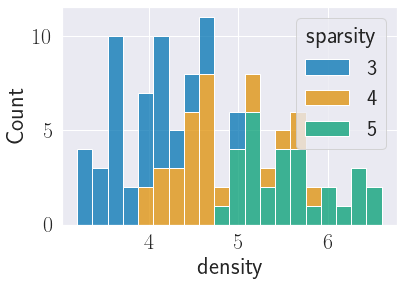

In [28]:
sns.histplot(data=df, x="density", hue="sparsity", palette="colorblind",  bins=20, multiple="stack");

In [113]:
dft = df#df.iloc[350:400]
sparseL1 = dft[(dft['m']<=50) & (dft['density']<=4.5) & (dft['density']>=3.5)]#& (dft['ncoeff']==0.1) dft['sparsity']==1.) &

In [114]:
#sns.color_palette("binary")

In [115]:
#plt.rcParams['text.usetex'] = True

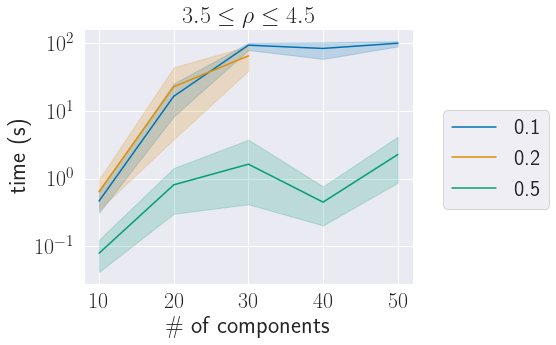

In [117]:
#df[['ncoeff', 'sparsity']].apply(tuple, axis=1)
#plt.style.use('grayscale')
#fig, ax = plt.subplots()
runs = [
    (None,"timeMINFAS",'defense_mintear_time.png',[10,20,30,40,50]),
    ("ncoeff","timescc",'defense_minscc_time.png',[10,20,30,40,50]),
    ("ncoeff","timetearfull",'defense_minassign_time_denser.png',[10,20,30,40,50]),
]
hue,y,filename,xticks = runs[2]
sns.set(font_scale = 2)
g = sns.relplot(data=sparseL1, x="m",  y=y, hue=hue, palette="colorblind", kind="line", aspect=1.24);
g = (g.set_axis_labels("\# of components","time (s)")).set(xticks=(xticks))
g.set(yscale = 'log');
g.set(title= r'$3.5 \le \rho \le 4.5$');
sns.move_legend(g, "lower center",
    bbox_to_anchor=(0.95, 0.4), ncol=1, title=None, frameon=True) 
plt.savefig(filename, dpi=200, bbox_inches="tight")

In [9]:
#sparseL1sq = sparseL1.copy()
#sparseL1sq["sqtimetear"] = np.log(sparseL1sq["timetear"])

In [14]:
dfpost = df.copy()
dfpost["deltascc"] = dfpost['maxscc']-dfpost['minscc']
dfpost["dguesstear"] = dfpost['mintear']-dfpost['minguess']

In [129]:
dfclean = sparseL1[(sparseL1["MINFAS"] <= 100)]

In [130]:
dfpost = dfclean.copy()
dfpost["dminfas"] = dfpost['MINFAS']/dfpost['m']
dfpost["dmintearpart"] = dfpost['mintearpart']/dfpost['m']
dfpost["dmintearfull"] = dfpost['mintearfull']/dfpost['m']

In [131]:
dfpost

,m,ncoeff,n,sparsity,seed,maxscc,guess,timeMINFAS,MINFAS,timetearpart,mintearpart,timetearfull,mintearfull,timescc,minscc,density,dminfas,dmintearpart,dmintearfull
1,10,0.1,11,3,1,10.0,4.0,0.009693,2.0,0.329609,2.0,0.672915,2.0,0.039564,9.0,4.10,0.20,0.20,0.20
2,10,0.1,11,3,2,10.0,5.0,0.004000,2.0,0.072231,1.0,0.073250,0.0,0.003826,0.0,3.70,0.20,0.10,0.00
3,10,0.1,11,3,3,10.0,8.0,0.014692,4.0,0.247854,2.0,0.331308,2.0,0.041113,9.0,3.70,0.40,0.20,0.20
4,10,0.1,11,3,4,8.0,7.0,0.004999,3.0,0.247375,2.0,0.303759,2.0,0.032488,6.0,4.10,0.30,0.20,0.20
5,10,0.1,11,3,5,9.0,7.0,0.012337,3.0,0.273144,3.0,0.539534,3.0,0.047682,9.0,3.60,0.30,0.30,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,50,0.5,75,3,5,16.0,28.0,0.029871,4.0,0.349487,3.0,0.349766,1.0,0.079706,2.0,3.64,0.08,0.06,0.02
551,50,0.5,75,3,6,35.0,30.0,1.077696,5.0,7.439821,3.0,0.527657,0.0,0.069672,0.0,3.92,0.10,0.06,0.00
552,50,0.5,75,3,7,26.0,31.0,0.089327,6.0,3.786320,3.0,3.230341,0.0,0.696880,0.0,4.46,0.12,0.06,0.00
553,50,0.5,75,3,8,36.0,27.0,0.650249,6.0,19.581709,3.0,8.444775,0.0,1.889984,0.0,4.16,0.12,0.06,0.00


In [15]:
dfclean = dfpost[(dfpost["dguesstear"] >= 0)]
#dfclean = dfclean[(dfclean['sparsity']==.5)]

In [16]:
#dfclean["deltascc"].sum()

In [141]:
sns.color_palette()[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

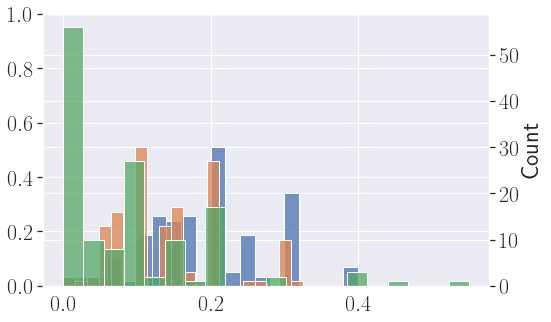

In [142]:
fig, ax = plt.subplots(figsize=(8,5))
ax2 = ax.twinx()
#sns.histplot(data=dfpost, x="dminfas", palette="colorblind", bins=20, multiple="stack");
sns.histplot(data=dfpost, x="dminfas", bins=20, color=sns.color_palette()[0]);
sns.histplot(data=dfpost, x="dmintearpart", bins=20, color=sns.color_palette()[1]);
sns.histplot(data=dfpost, x="dmintearfull", bins=20, color=sns.color_palette()[2]);
#ax.set_xlabel(r'$\Delta$ in guess');
#plt.savefig('tearing_improvements_wrt_baseline.png', dpi=200, bbox_inches='tight');

In [167]:
dfclean = sparseL1[(sparseL1["MINFAS"] <= 100) & (sparseL1["m"]==20)]

In [205]:
len(dfclean)

37

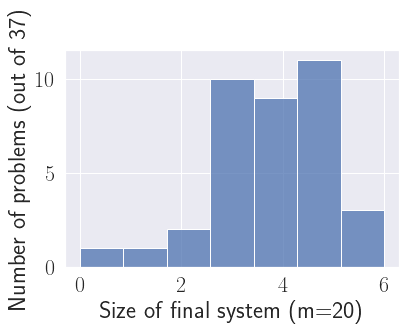

In [207]:
#fig, ax = plt.subplots(figsize=(8,5))
#ax2 = ax.twinx()
#sns.histplot(data=dfpost, x="dminfas", hue="ncoeff", palette="colorblind", bins=20, multiple="stack");
g=sns.histplot(data=dfclean, x="MINFAS", palette="colorblind", multiple="stack", color=sns.color_palette()[0]);
#g=sns.histplot(data=dfclean, x="mintearpart", palette="colorblind", multiple="stack", color=sns.color_palette()[1]);
#g=sns.histplot(data=dfclean, x="mintearfull", palette="colorblind", multiple="stack", color=sns.color_palette()[2]);
#sns.move_legend(g, "lower center",
#    bbox_to_anchor=(1.2, 0.4), ncol=1, title=None, frameon=True) 
g.set_ylabel(r'Number of problems (out of 37)');
g.set_xlabel(r'Size of final system (m=20)');
plt.savefig('defense_tearing_improvements_wrt_baseline_mintearfull.png', dpi=200, bbox_inches='tight');